In [1]:
# import
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors  # knihovna pro deskriptory
from rdkit.Chem import rdMolDescriptors as rdescriptors  # druha knihovna pro deskriptory
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import pandas as pd
import seaborn as sns
import itertools

C:\Users\pslav\AppData\Local\Temp\ipykernel_2720\312260294.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# nacteni set1 (drugbank)
drugbank = [mol for mol in Chem.SDMolSupplier('data/drugbank.sdf') if mol]

[18:28:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[18:28:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[18:28:52] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[18:28:52] ERROR: Could not sanitize molecule ending on line 250947
[18:28:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[18:28:52] Explicit valence for atom # 17 O, 3, is greater than permitted
[18:28:52] ERROR: Could not sanitize molecule ending on line 258130
[18:28:52] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[18:28:52] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[18:28:52] ERROR: Could not sanitize molecule ending on line 261581
[18:28:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[18:28:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[18:28:52] ERROR: Could not 

In [2]:
pains = []

with open('data/pains/p_l15.txt') as inp:
    for line in inp:
        pain, name = line.strip().split('\t')
        pains.append((Chem.MolFromSmarts(pain), name))

with open('data/pains/p_m150.txt') as inp:
    for line in inp:
        pain, name = line.strip().split('\t')
        pains.append((Chem.MolFromSmarts(pain), name))

In [3]:
#pains

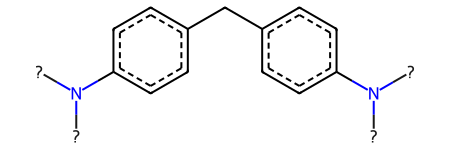

In [4]:
pains[0][0]

In [7]:
issues = []
for mol in drugbank:
    issue = []
    for id, (pain, name) in enumerate(pains):
        if mol.GetSubstructMatches(pain):
            issues.append(id)
        issues.append(issue)

In [8]:
problematic = [(id, [i]) for id, i in enumerate(issues) if i]

In [9]:
len(problematic)

128

In [10]:
problematic

[(26338, [413]),
 (60769, [418]),
 (83715, [413]),
 (90107, [4]),
 (117292, [413]),
 (125797, [417]),
 (141944, [413]),
 (163196, [414]),
 (181062, [4]),
 (213347, [413]),
 (246923, [413]),
 (289000, [414]),
 (295822, [10]),
 (312377, [414]),
 (373152, [413]),
 (380379, [414]),
 (383779, [413]),
 (385485, [418]),
 (422881, [413]),
 (431404, [10]),
 (444138, [418]),
 (448384, [413]),
 (459860, [413]),
 (473927, [29]),
 (478988, [414]),
 (483668, [418]),
 (511911, [185]),
 (531691, [414]),
 (598882, [29]),
 (617542, [413]),
 (668543, [413]),
 (714444, [413]),
 (747596, [414]),
 (782876, [418]),
 (806277, [18]),
 (845357, [422]),
 (893799, [413]),
 (895925, [413]),
 (905701, [413]),
 (943527, [413]),
 (987728, [413]),
 (1080388, [422]),
 (1118206, [414]),
 (1141156, [413]),
 (1141582, [413]),
 (1157733, [413]),
 (1204484, [413]),
 (1212135, [413]),
 (1237212, [414]),
 (1297138, [414]),
 (1309039, [414]),
 (1329469, [18]),
 (1349012, [10]),
 (1358342, [414]),
 (1365567, [413]),
 (1367693, 

In [11]:
from collections import defaultdict

In [12]:
counts = defaultdict(lambda: 0)
for drug, lp in problematic:
    for p in lp:
        counts[p] += 1

In [13]:
print(counts.items())
len(counts.items())

dict_items([(413, 51), (418, 8), (4, 2), (417, 7), (414, 35), (10, 5), (29, 2), (185, 1), (18, 2), (422, 4), (205, 3), (415, 4), (419, 2), (423, 1), (11, 1)])


15

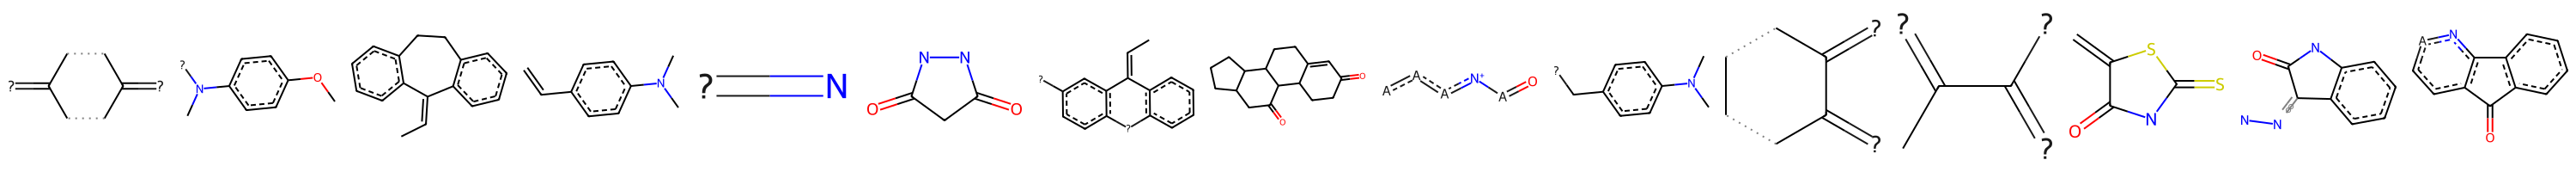

In [14]:
Draw.MolsToImage([pains[key][0] for key, count in counts.items()])
    

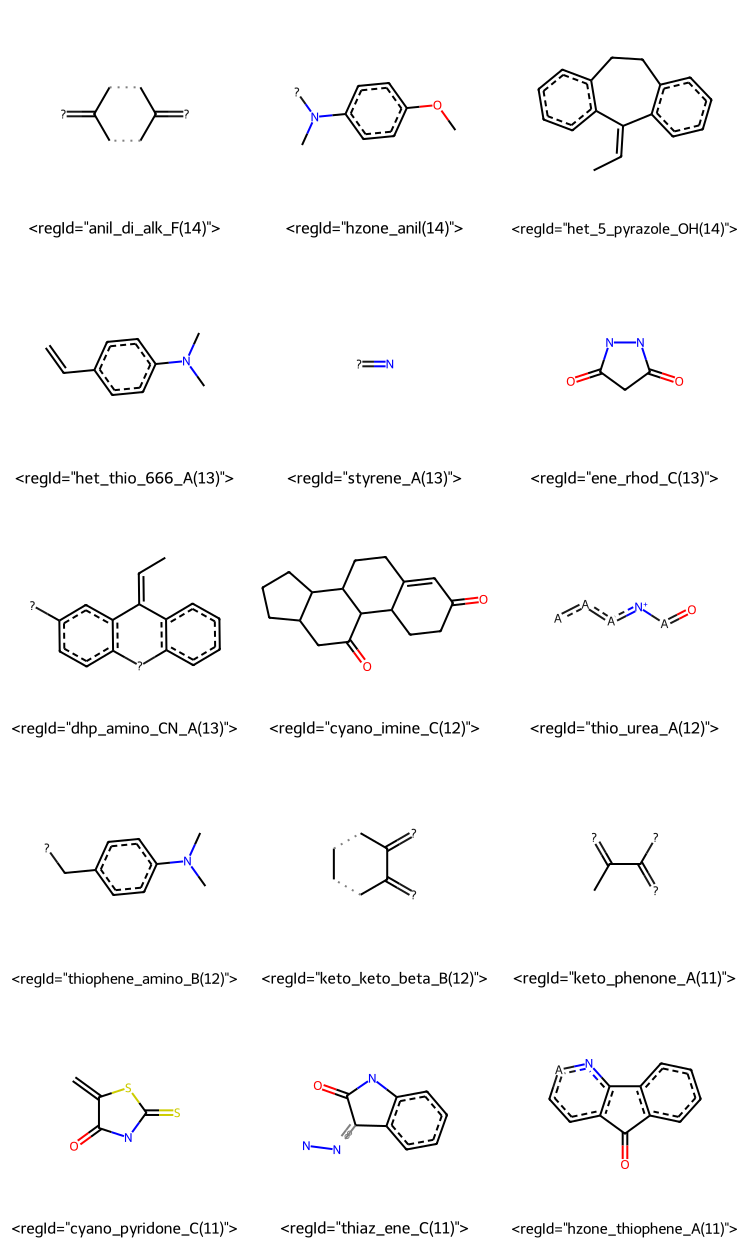

In [21]:
Draw.MolsToGridImage([pains[key][0] for key, count in counts.items()], molsPerRow = 3, subImgSize=(250,250), legends=[pain[1] for pain in pains])

In [22]:
freq_pains = [(pains[key][0], pains[key][1], count) for key, count in counts.items()]

In [23]:
freq_pains

[(<rdkit.Chem.rdchem.Mol at 0x1f11c449d90>, '<regId="quinone_A(370)">', 51),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c449fc0>, '<regId="anil_di_alk_C(246)">', 8),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c39a8f0>, '<regId="styrene_A(13)">', 2),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c449e70>, '<regId="anil_di_alk_B(251)">', 7),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c449d20>, '<regId="azo_A(324)">', 35),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c39ab20>,
  '<regId="keto_keto_beta_B(12)">',
  5),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c39b370>, '<regId="styrene_B(8)">', 2),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c43b840>, '<regId="steroid_A(2)">', 1),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c39af10>, '<regId="acyl_het_A(9)">', 2),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c44a110>, '<regId="anil_di_alk_D(198)">', 4),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c440200>, '<regId="quinone_D(2)">', 3),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c449e00>, '<regId="imine_one_A(321)">', 4),
 (<rdkit.Chem.rdchem.Mol at 0x1f11c449f50>, '<regId="ene_rhod_A(235)">', 2

In [25]:
freq_pains[0][1]

'<regId="quinone_A(370)">'

In [28]:
counts

defaultdict(<function __main__.<lambda>()>,
            {413: 51,
             418: 8,
             4: 2,
             417: 7,
             414: 35,
             10: 5,
             29: 2,
             185: 1,
             18: 2,
             422: 4,
             205: 3,
             415: 4,
             419: 2,
             423: 1,
             11: 1})

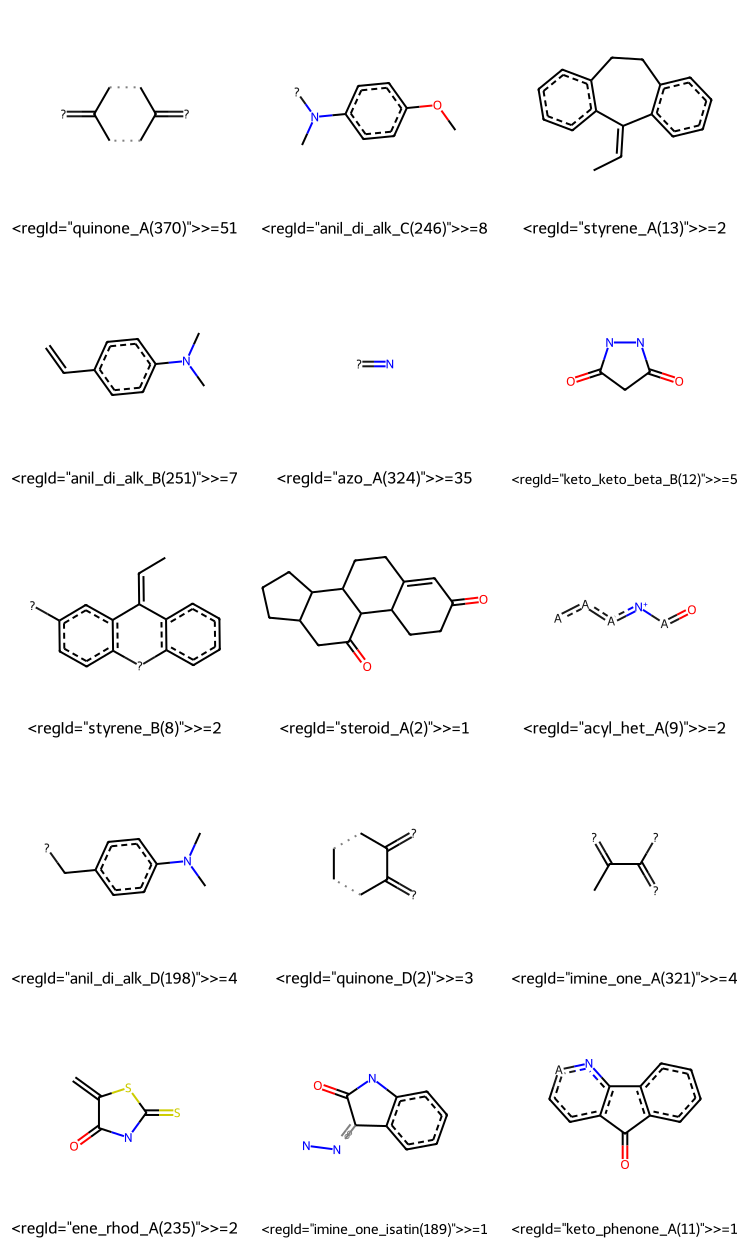

In [29]:
Draw.MolsToGridImage([freq_pains[i][0] for i in range(len(freq_pains))], molsPerRow = 3, subImgSize=(250,250), legends=[f'{p[1]}>={p[2]}' for p in freq_pains])

In [30]:
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')

In [31]:
def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    #return d.GetDrawingText()
    display(SVG(d.GetDrawingText()))

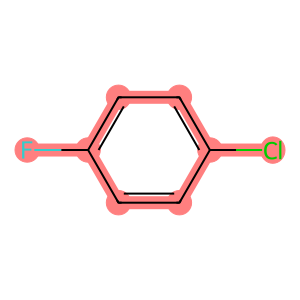

In [35]:
pict = visualize_match(mol, patt)

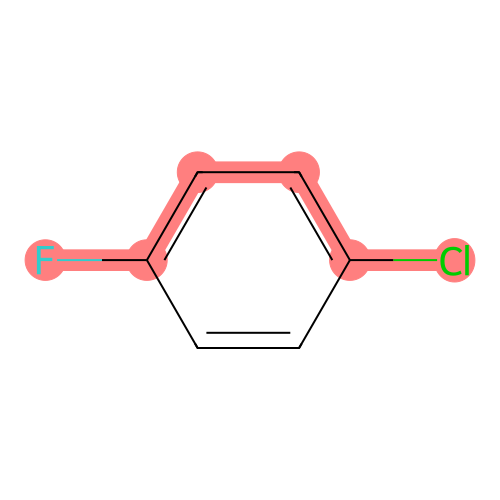

In [86]:
SVG(pict.GetDrawingText())